In [84]:
import torch

# Define the coefficients of the polynomial as a tensor with requires_grad=True
coefficients = torch.tensor([0.,0.,0.,0.], requires_grad=True)  # Example: 1*x^2 - 3*x + 2

# Define the polynomial function
def polynomial(x, coeffs):
    return coeffs[0] + x * coeffs[1] + x**2 * coeffs[2] + x**3 * coeffs[3]


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (in our case, its y = A*x + b)
class PolynomialLayer(nn.Module):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Random guess for parameters A and B
        self.Porder = 6
        self.coeffs = nn.parameter.Parameter(torch.zeros(self.Porder+1, requires_grad=True))


    def forward(self, x):
        basis = torch.stack([x**i for i in range(self.Porder+1)], dim=1)
        return torch.matmul(basis, self.coeffs)
        # return self.coeffs[0] + self.coeffs[1] * x + self.coeffs[2] * x**2 + self.coeffs[3] * x**3


# Generate noisy samples of a sine function on the unit interval [0, 1]
x_samples = torch.linspace(0, 1, steps=100)
y_samples = torch.sin(2 * np.pi * x_samples) + np.random.normal(0, 0.1, x_samples.size())
# y_samples = 3.0*x_samples + np.random.normal(0, 0.1, x_samples.size())

# Create the model and optimizer
model = PolynomialLayer()
optimizer = optim.SGD(model.parameters(), lr=0.005)

num_epochs = 100000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_samples)
    loss = torch.sum((outputs - y_samples) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()),model.coeffs.detach().numpy())


# # Plot the noisy samples
plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
plt.plot(x_samples.numpy(), model(x_samples).detach().numpy(), label='Fit polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epoch 0, Loss 48.92922396112222 [ 0.01236531 -0.1503577  -0.15151101 -0.12846    -0.10526917 -0.0860873
 -0.07093779]
Epoch 1000, Loss 5.196904861349769 [ 0.61762804  1.6063379  -4.404288   -3.0101094  -0.290802    2.0355394
  3.6892824 ]
Epoch 2000, Loss 3.9625779246908985 [ 0.43972465  2.9787164  -5.931027   -3.8480685  -0.19058475  2.623306
  4.3333116 ]
Epoch 3000, Loss 3.6651634979998913 [ 0.3691691   3.5865188  -6.827425   -4.0293016   0.14383307  2.9478972
  4.262149  ]
Epoch 4000, Loss 3.48848661535755 [ 0.33594072  3.926292   -7.4946275  -3.9876657   0.549842    3.1782317
  3.953099  ]
Epoch 5000, Loss 3.3348131136299672 [ 0.31586725  4.1695194  -8.071434   -3.872758    0.9716267   3.3726995
  3.5705926 ]
Epoch 6000, Loss 3.191980857056708 [ 0.30060267  4.3754826  -8.606085   -3.7360618   1.3902059   3.5515459
  3.1710875 ]
Epoch 7000, Loss 3.058045191971593 [ 0.2872572  4.564759  -9.115549  -3.5952454  1.7992921  3.721863
  2.773803 ]
Epoch 8000, Loss 2.9323115334923737 [ 0.2

KeyboardInterrupt: 

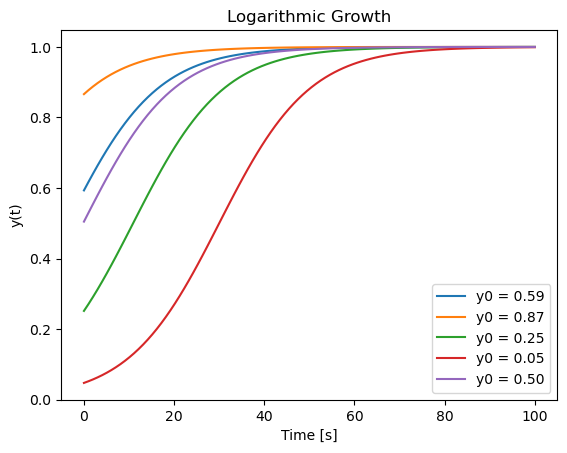

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation for logarithmic growth
def log_growth(y, t, k):
    return k * y*(1.0-y)

# Set initial conditions and parameters
y0 = 0.1  # Initial value (must be > 1 to avoid log(0))
k = 0.1   # Growth rate constant

# Time points
t = np.linspace(0, 100, 100)

# Integrate the equation
solution = odeint(log_growth, y0, t, args=(k,))

# Plot the results
plt.figure()
for i in range(5):
    y0 = np.random.rand()
    solution = odeint(log_growth, y0, t, args=(k,))
    plt.plot(t, solution, label='y0 = {:.2f}'.format(y0))
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('y(t)')
plt.title('Logarithmic Growth')
plt.show()

In [86]:
# generate a dataset consisting of many profiles for different initial conditions
def getDataset(Ndata):
    def log_growth(y, t, k):
        return k * y*(1.0-y)

    # Set initial conditions and parameters
    y0 = 0.1  # Initial value (must be > 1 to avoid log(0))
    k = 0.1   # Growth rate constant

    # Time points
    t = np.linspace(0, 100, 200)

    # Integrate the equation
    datasetList = []
    for i in range(Ndata):
        y0 = np.random.rand()
        datasetList.append(odeint(log_growth, y0, t, args=(k,))[:,0]+np.random.normal(0, 0.005, t.size))
    return t, np.array(datasetList)

Ndata = 20
time, dataset = getDataset(Ndata)
print(dataset.shape)

(20, 200)


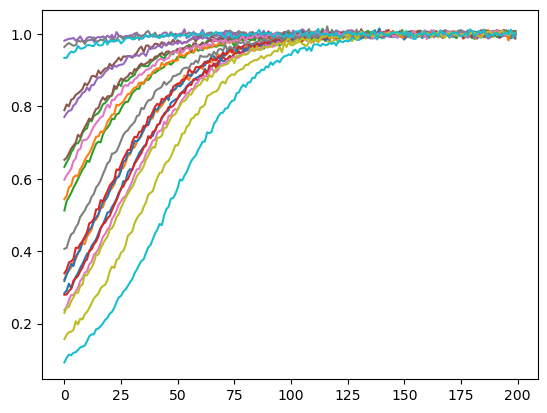

In [87]:
plt.plot(dataset.T)

In [88]:
# Calculate time derivative of dataset
def calculateDerivative(dataset):
    derivative = np.zeros_like(dataset)
    dt = time[1] - time[0]
    for i in range(dataset.shape[0]):
        for j in range(1, dataset.shape[1]):
            derivative[i, j] = (dataset[i, j] - dataset[i, j-1]) / dt
    return derivative

dydt = calculateDerivative(dataset)

In [89]:
dataset.shape

(20, 200)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (in our case, its y = A*x + b)
class PopulationModel(nn.Module):
    def __init__(self):
        super(PopulationModel, self).__init__()
        # Random guess for parameters A and B
        self.parameter = nn.parameter.Parameter(torch.tensor(0.0),requires_grad=True)


    def forward(self, x):
        return self.parameter*x*(1.0-x)

modelinput = torch.tensor(dataset,dtype=torch.float32)
model = PopulationModel()
optimizer = optim.Adam(model.parameters(), lr=0.005)
model(modelinput[0,:])

num_epochs = 100000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # choose a random solution from the dataset
    dataindex = np.random.randint(0,Ndata)
    modelinput = torch.tensor(dataset[dataindex,:],dtype=torch.float32)
    modeloutput = model(modelinput)
    #take derivative of dataset
    loss = torch.sum((modeloutput-torch.tensor(dydt[dataindex]))**2)
    # loss = torch.sum((modeloutput - dydt[dataindex]) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()),model.parameter.detach().numpy())


# # # Plot the noisy samples
# plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
# plt.plot(x_samples.numpy(), model(x_samples).detach().numpy(), label='Fit polynomial', color='red')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

Epoch 0, Loss 0.058193558327754524 0.0050000004
Epoch 1000, Loss 0.037403324093378966 0.09093136
Epoch 2000, Loss 0.031163587376854554 0.08952012
Epoch 3000, Loss 0.0451670859910462 0.088295
Epoch 4000, Loss 0.041625462255595554 0.099629276
Epoch 5000, Loss 0.03280068634086235 0.09447444
Epoch 6000, Loss 0.04521003242760668 0.09228186
Epoch 7000, Loss 0.03090011912275465 0.09985866
Epoch 8000, Loss 0.03884382366545944 0.09574638
Epoch 9000, Loss 0.03974721902322249 0.09704124
Epoch 10000, Loss 0.03500032575863608 0.09632402
Epoch 11000, Loss 0.03492943257252503 0.09266064
Epoch 12000, Loss 0.04140317244213004 0.09635474
Epoch 13000, Loss 0.038587448726948415 0.09210858
Epoch 14000, Loss 0.03966828462322456 0.095180646
Epoch 15000, Loss 0.04519212531713376 0.08896941
Epoch 16000, Loss 0.044152566349284356 0.09541552
Epoch 17000, Loss 0.03887429008518768 0.0934873
Epoch 18000, Loss 0.044170569679203804 0.0985923
Epoch 19000, Loss 0.041542484923367165 0.09602921
Epoch 20000, Loss 0.042333

In [94]:
# Define the model (in our case, its y = A*x + b)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Neural network with one hidden layer of 20 neurons with tanh activation
        self.hidden = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )


    def forward(self, x):
        return self.hidden(x)
    
# Generate noisy samples of a sine function on the unit interval [0, 1]
x_samples = torch.linspace(0, 1, steps=100)
y_samples = torch.sin(2 * np.pi * x_samples) + np.random.normal(0, 0.1, x_samples.size())
# y_samples = 3.0*x_samples + np.random.normal(0, 0.1, x_samples.size())

# Create the model and optimizer
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.005)

num_epochs = 20000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_samples.unsqueeze(1))
    loss = torch.sum((outputs.squeeze() - y_samples) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()))

Epoch 0, Loss 62.645133345535626
Epoch 1000, Loss 0.9454666164683352
Epoch 2000, Loss 0.9417368990215331
Epoch 3000, Loss 0.9408425705006174
Epoch 4000, Loss 0.9452243134848987
Epoch 5000, Loss 0.9695689033061464
Epoch 6000, Loss 0.9412232956802076
Epoch 7000, Loss 0.9382070690477704
Epoch 8000, Loss 0.9383894627587778
Epoch 9000, Loss 0.9295437189203986
Epoch 10000, Loss 0.9161759693791564
Epoch 11000, Loss 0.8896919127020215
Epoch 12000, Loss 0.8499265943173819
Epoch 13000, Loss 0.8380921036094606
Epoch 14000, Loss 0.8404546213159583
Epoch 15000, Loss 0.8169990064275178
Epoch 16000, Loss 0.788982498937489
Epoch 17000, Loss 0.7766102185116265
Epoch 18000, Loss 0.7568132551902035
Epoch 19000, Loss 0.7303376051954249


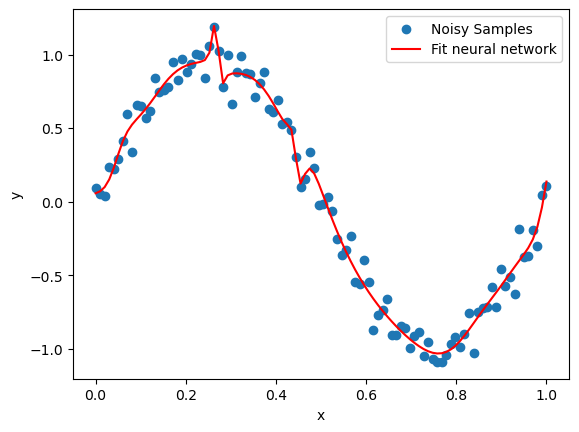

In [95]:
# visualize the results
plt.scatter(x_samples.numpy(), y_samples, label='Noisy Samples')
plt.plot(x_samples.numpy(), model(x_samples.unsqueeze(1)).detach().numpy(), label='Fit neural network', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
